# Klaviyo Data Science Exercise 

Tejaswi Rachapudi

trachapudi17@gmail.com

The CSV file used lists the customer, date, and dollar value of orders placed at a store in 2017. The actual gender and predicted gender of each customer is also provided. $0 orders are not excluded.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import confusion_matrix

In [4]:
# reading in data and displaying 10 observations
file_path = "~/Company Screening Exercises/screening_exercise_orders_v201810.csv"
orders = pd.read_csv(file_path, parse_dates=['date'])
orders.head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)


Sort the dataframe by customer_id ascending and display the first 10 rows.

In [6]:
# creating dataframe (already sorted by customer_id ascending) with calculated columns and displaying first 10 rows
orders_sub = orders.groupby(['customer_id']).size().reset_index(name='order_count')
orders_sub.insert(1, 'gender', orders['gender'])
orders_sub['most_recent_order_date'] = orders.groupby(['customer_id'])['date'].transform('max') 
orders_sub.head(10)

,customer_id,gender,order_count,most_recent_order_date
0,1000,0,1,2017-01-01 00:11:31
1,1001,0,1,2017-01-01 00:29:56
2,1002,1,3,2017-02-19 21:35:31
3,1003,1,4,2017-04-26 02:37:20
4,1004,0,1,2017-01-01 03:11:54
5,1005,1,2,2017-12-16 01:39:27
6,1006,1,3,2017-05-09 15:27:20
7,1007,0,1,2017-01-01 15:59:50
8,1008,0,3,2017-12-17 05:47:48
9,1009,1,1,2017-01-01 19:27:17


B) Plot the count of orders per week for the store.

[Text(0, 0.5, 'Order Count')]

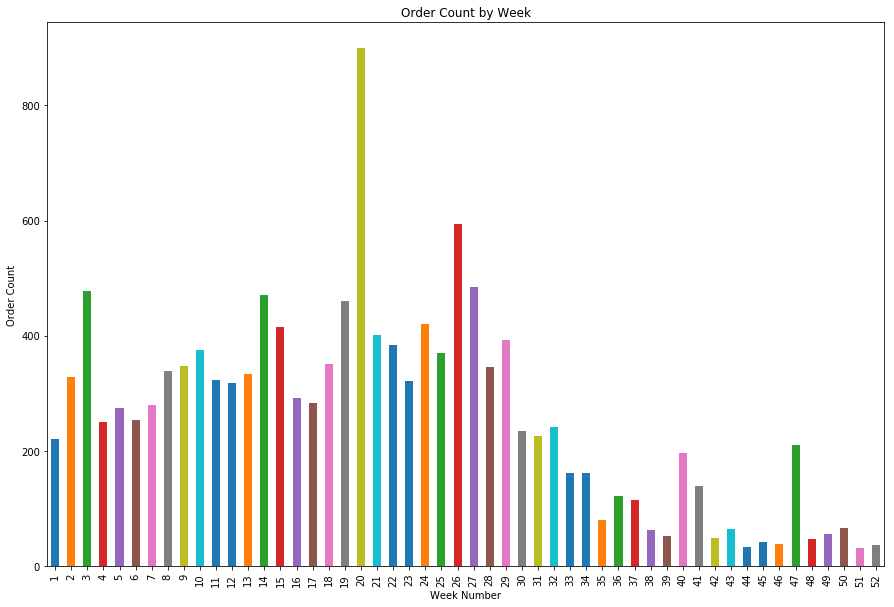

In [7]:
# using groupby to plot order count by week number 
orders_sub['Week Number'] = pd.to_datetime(orders_sub['most_recent_order_date']).dt.week
fig, ax = plt.subplots(figsize=(15,10))
orders_sub.groupby(orders_sub['Week Number'])['order_count'].sum().plot(kind='bar', ax=ax)
ax.set_title('Order Count by Week')
ax.set(ylabel = 'Order Count')    

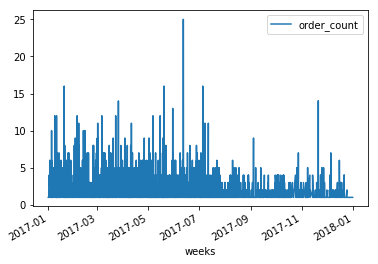

In [8]:
orders_sub['weeks'] = pd.to_datetime(orders_sub['most_recent_order_date'])
orders_sub.plot(x='weeks', y='order_count')

Based on my recent experience with Tableau, creating a bar plot to visualize order count per week would be very easy and quick. If I were to do this, I would be able to efficiently plot by week and label the plot so that the reader can see how many orders were made per week, with a clear week date stamp, something that would take a bit longer using Python. 

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [74]:
# computing mean order value for each gender type
orders.groupby('gender')['value'].mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [88]:
# calculating max order value 
orders['value'].max()

8046.3

There is a clear difference in mean order value between the two genders, as gender 0 has a higher mean order value of \\$363.89, while gender 1 has a mean order value of \\$350.71. The difference, however, is not significant because if we take a look at the order values per customer in the original *orders* dataset, we see that order values are in the hundreds to thousands, ranging from \\$0 to \\$8,046. A ~\\$13 difference is not significant in terms of the range of the data. 

D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [75]:
# generating confusion matrix for gender predictions, assuming only one gender prediction for each customer
confusion_matrix(orders['gender'], orders['predicted_gender'])

array([[3349, 3410],
       [1463, 5249]])

The diagonal of the confusion matrix tells us that 3349 predictions were correctly classified as gender 0, whereas 5249 predictions were correctly classified as gender 1. These predictions are the true positives and true negatives, respectively. 1463 predictions were misclassified to be gender 0 when the correct classification is gender 1, while 3410 predictions were misclassified as gender 1 when the correct classification is gender 0. These are the false negatives and false positives, respectively. The true positive and true negative values are generally higher than the false positive and false negative, which is better. However, there are still many incorrect predictions compared to correct classifications. The true positive rate, or the hit rate, is 3349/(3349+3410) = 49.5%, while the true negative rate is 5249/(1463+5249) = 78.2%. The quality of the predictions could be better, as we only have about a 50% classification rate for gender 0.

E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

The most useful tool in this exercise is the pandas *groupby* function, which allows a user to filter and apply aggregate functions to the data. In these exercises, I have used the *groupby* function to calculate the order count per customer, as well as to find the most recent order date per customer. This function has made it efficient and easy to perform such calculations in a single step. I have also found that *groupby* is functional for creating a bar plot to visualize order count per week, since I can perform an aggregation of order counts grouped by order date, which is displayed by week. This plot creation can be done in one step as well. Lastly, *groupby* can be used for quick statistics calculations, such as mean and max, as I have simulated above. Overall, this tool is a great way to learn more about the data that is being explored, and it is definitely a function I find myself using often.  